## Create a matrix of ratings for item (game) x user: the utility matrix

### Springboard Capstone 2 project: building a recommendation engine
### John Burt


### Purpose of this notebook:

Generate and save a ratings matrix of user (rows) x games (cols). This matrix will be used by various notebook scripts, such as during hyperparameter tuning.


#### The method:

- Load user-game ratings data into a pandas dataframe from provided csv files.

- Use pivot to convert the data into a games(rows) X users(cols) rating matrix, with NaNs where users haven't rated games (majority of cells).

- Drop users who rated too few games, or gave outlier ratings.

- Save the matrix.


## Load ratings and game ID data from csv files


In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

from datetime import datetime

pd.options.display.max_rows = 100

srcdir = './data/'

# load the boardgame user data
userdata = pd.read_csv(srcdir+'bgg_user_ratings.csv') 
userdata=userdata.rename(columns = {'username':'userID', 'gameid':'gameID'})

# load the boardgame title data
# titledata = pd.read_csv(srcdir+'boardgame-titles.csv')
titledata = pd.read_csv(srcdir+'bgg_gamelist.csv')

# rename the gameID column
titledata=titledata.rename(columns = {"id":'gameID'})
titledata.reset_index(inplace=True)

#print(userdata.head())
#print("\n", titledata.head())

print(userdata.shape)
print(titledata.shape)


(15735688, 3)
(12600, 7)


### Looking at the number of ratings per user

In [2]:
usergp = userdata.groupby('userID').count()
usergp.head()

,gameID,rating
userID,,
Fu_Koios,2,2
beastvol,13,13
mycroft,21,21
woh,5,5
(mostly) harmless,1,1


### Rating frequency histogram.

Most users only rate between 1-10 games. 

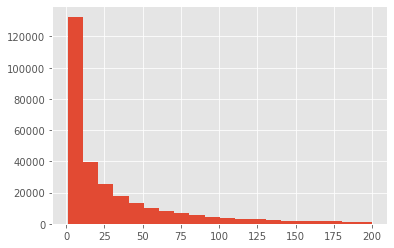

In [3]:
usergp['rating'].hist(bins=20, range=[1,200])

## Reduce size of dataset by dropping users with too few ratings

- I'll set a minimum rating threshold of 50 ratings. This will eliminate most users, but what I keep will be more meaningful for the matrix factorization and even then I'll be close to my RAM limit.
- I also drop any duplicate ratings, which show up sometimes.

In [5]:
minratings = 50
filt_users = userdata.set_index('userID')
users_ok = usergp[usergp['rating'] > minratings].index.values
filt_users = filt_users.loc[users_ok]

print('filt_users after #rating threshold:', filt_users.shape)

filt_users = filt_users.reset_index()
filt_users = filt_users.drop_duplicates(subset=['userID', 'gameID'])

print('filt_users after drop dupes:', filt_users.shape)

filt_users.head()


filt_users after #rating threshold: (12810751, 2)
filt_users after drop dupes: (12765970, 3)


,userID,gameID,rating
0,-=Yod@=-,1917,8.0
1,-=Yod@=-,12333,10.0
2,-=Yod@=-,10547,9.0
3,-=Yod@=-,37380,8.0
4,-=Yod@=-,74,7.5


## Pivot user rating data, creating users (row) x gameID (col) x rating

In [6]:
# pivot the rating data to create rows of games, with columns of users. 
# If a user rated a game, it will be at game x user and if not, then the cell will be NAN
rp = filt_users.pivot(index="gameID", columns="userID", values="rating")
rp.head()

userID,-=Yod@=-,-Johnny-,-Loren-,-mIDE-,-toni-,.JcK.,0 1 1 2 3 5 8,000Ryuk000,000undo000,00vito,015599m,01hejazi,01schafi,0321,0492372665,0815Spieler,096959,0NCK0,0b1_Ita,0ddjob,0hoHj,0lexandr,0lukasz0,0minus,0xDEADBEEF,1 Family Meeple,1000Hornets,1000days,1000games,1000rpm,100fred0,100pcBlade,100rk,1024b,105JS2687S2003,10lpmckey,10th_King,117010097,11dete,11maranzano,11twelve,123ABC,123Apina,123ehdrmfl,123jennywren,12from1,12is,12thManStanding,1337HOUSE,13javier,...,zuzubun,zuzusdad,zuzuzu,zvitorepec,zwalex,zwaq,zwara81,zwarbo,zwdp9,zweiblum,zweierbear,zweistein,zweken,zwembroek,zwika47,zwinky,zwobot,zwyagel,zx6332,zx80,zxbbcc,zxcvbn2,zxlime,zxlitening45,zxurian,zyanne,zyater,zybthranger,zydoz,zyklonc,zyklotron,zyreg,zyrus,zyss,zyx0xyz,zyxbg,zyxyv,zz2282,zzap1977,zzapper0,zzas,zzay,zzelly,zzeroparticle,zzhou,zztap,zzyzxuk,zzzabiss,zzzeagle,zzzzzane
gameID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,9.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,NaN,8.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,8.0,8.0,7.0,...,6.5,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,8.0,8.50,NaN,NaN,NaN,NaN,7.5,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,9.5,8.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,6.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,7.8,8.69,NaN,NaN,NaN,7.0,7.3,NaN,9.0,NaN,NaN,6.0,7.0,NaN,NaN,NaN


## Do some more user filtering.

The purpose of this filtering is to 1) reduce the dataset size but keep the most ratings, and 2) remove potentially unhelpful and outlier users (people who rate everything a narrow range of values, or rate everything low).

Drop users:
- Who have rated < threshold # games
- Whose scores have range < threshold
- Whose score max < threshold


In [7]:
mincount = 10 # min num ratings threshold
minrange = 4 # min rating range threshold
minmax = 7 # max rating min threshold

# number of ratings by each user
usercounts = np.count_nonzero(~np.isnan(rp.values),0)

# drop users with fewer than mincount ratings
rp_filt = rp.drop(rp.columns[usercounts<mincount], axis=1)

print("dropped %d < %d ratings"%(rp.shape[1]-rp_filt.shape[1], mincount))

# rating range for each user
userrange = rp_filt.max(axis=0) - rp_filt.min(axis=0)

oldnumusers = rp_filt.shape[1]

# drop users with rating range less than minrange
rp_filt = rp_filt.drop(rp_filt.columns[userrange<minrange], axis=1)

print("dropped %d < %d rating range"%(oldnumusers-rp_filt.shape[1], minrange))

# max rating range for each user
usermax = rp_filt.max(axis=0)

oldnumusers = rp_filt.shape[1]

# drop users with rating max less than minmax
rp_filt = rp_filt.drop(rp_filt.columns[usermax<minmax], axis=1)

print("dropped %d max rating < %d"%(oldnumusers-rp_filt.shape[1],minmax))

print("\ntotal #users now = %d"%(rp_filt.shape[1]))

dropped 0 < 10 ratings
dropped 3147 < 4 rating range
dropped 0 max rating < 7

total #users now = 69910


## Print user stats

Also, optionally range scores for each user between 1 - 10. This ensures that all users have the same ratings range. This seems to help the SVD produce more meaningful feature dimensions.

Note: I'm not doing this currently - it seems to have little effect on model results.

In [8]:
userratingmax = rp_filt.max(axis=0)
userratingmin = rp_filt.min(axis=0)

print('highest rating: min=%1.0f, mean=%1.0f, max=%1.0f'%(
    np.min(userratingmax), np.mean(userratingmax), np.max(userratingmax)))
print('lowest rating: min=%1.0f, mean=%1.0f, max=%1.0f'%(
    np.min(userratingmin), np.mean(userratingmin), np.max(userratingmin)))

# if False:
#     rp_fixed = 9 * (rp_filt - userratingmin) / (userratingmax-userratingmin) + 1


highest rating: min=7, mean=10, max=10
lowest rating: min=1, mean=4, max=6


## Save game x user rating matrix to HDF5 file

In [9]:
# change user names to ID numbers
# rp_filt.columns = [rp_filt.columns[0]] + [str(i) for i in range(1,rp_filt.shape[1])]
rp_filt.columns = [[str(i+1) for i in range(rp_filt.shape[1])]

rp_filt.to_hdf(srcdir+'bgg_game_mx_unfilled.h5', key='mx')
